<a href="https://colab.research.google.com/github/misheljoy/Projects/blob/main/delhivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181

--2023-04-23 11:42:40--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 54.230.209.118, 54.230.209.166, 54.230.209.194, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|54.230.209.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delhivery_data.csv?1642751181.11’

delhivery_data.csv? 100%[===================>]  53.04M   169MB/s    in 0.3s    

2023-04-23 11:42:40 (169 MB/s) - ‘delhivery_data.csv?1642751181.11’ saved [55617130/55617130]



#  Problem Statement
Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it


In [ ]:
# importing necessory modules for analysis
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# analysing content of data
data = pd.read_csv("delhivery_data.csv?1642751181")
data.head(9)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000


# Analyze the structure of the data

In [ ]:
data.shape

(144867, 24)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

Observations:


*  It has 24 colums and  144867 rows.
*  It can be observed the non-null count of some fields are less than 144867, there are missing values in those fields.



# Missing Value Treatment

In [ ]:
# null value evaluation
data.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
# checking for nullvalue coresponding  source_centers
null_source = data[data["source_name"].isnull() ]["source_center"].unique()
null_source

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [ ]:
# conforming source_centres with null values in source name account for all the null values
source=  data[data["source_center"].isin (null_source)]["source_name"].unique()
source

array([nan], dtype=object)

In [ ]:
#  number of unique source _centers with null values
null_source_num= data[data["source_name"].isnull() ]["source_center"].nunique()
null_source_num

10

In [ ]:
# checking for nullvalue coresponding  destination_centers
null_destination = data[data["destination_name"].isnull() ]["destination_center"].unique()
null_destination

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [ ]:
#  number of unique source _centers with null values
null_destination_num= data[data["destination_name"].isnull() ]["destination_center"].nunique()
null_destination_num

13

In [ ]:
# conforming destination_centres with null values in destination name account for all the null values
destination = data[data["destination_center"].isin (null_destination)]["destination_name"].unique()
destination

array([nan], dtype=object)

In [ ]:
#  checking destination_centre code available in source_centre
dest_lst = []
for dest in null_destination:
  if dest not in null_source:
    dest_lst. append(dest)
dest_lst

['IND221005A1A', 'IND250002AAC', 'IND331001A1C', 'IND122015AAC']

In [ ]:
x = data[ data["source_center"].isin(dest_lst)]["source_name"]
x

Series([], Name: source_name, dtype: object)

In [ ]:
lst = np.unique(np.concatenate([null_source,null_destination]))
value = 1
d = {}
for i in lst:
  d[i] = f"center_name_{value}"
  value += 1
d

{'IND122015AAC': 'center_name_1',
 'IND126116AAA': 'center_name_2',
 'IND221005A1A': 'center_name_3',
 'IND250002AAC': 'center_name_4',
 'IND282002AAD': 'center_name_5',
 'IND331001A1C': 'center_name_6',
 'IND331022A1B': 'center_name_7',
 'IND342902A1B': 'center_name_8',
 'IND465333A1B': 'center_name_9',
 'IND505326AAB': 'center_name_10',
 'IND509103AAC': 'center_name_11',
 'IND577116AAA': 'center_name_12',
 'IND841301AAC': 'center_name_13',
 'IND852118A1B': 'center_name_14'}

In [ ]:
data["source_name"] = data["source_name"].fillna(data["source_center"].map(d))
data["destination_name"] = data["destination_name"].fillna(data["destination_center"].map(d))
data.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

Observations:
*   Necessory checks were done identify the unique centre id of the missing values.
*   14 unique source name and destination name are missing.
*   Centers id can be source or destination.
*   Assign names to all distinct center id
*   Fill all nan values with newly assigned names






# Data Cleaning and Feature Creation


In [ ]:
# Droping unknown columns
data.drop(columns=["data","is_cutoff","cutoff_factor","cutoff_timestamp","factor","segment_factor"], inplace=True)

In [ ]:
# Function to split State from name
def name_state(x):
 state = x.split('(')[-1] #splitting from '(' and take index 1 value
 state = state.split(')')[0]
 return state

def city_place_code(x):
  state = x.split('(')[0] #splitting from '(' and take index 0 value
  return state

def city(x):
  state = x.split('_',1)[0] #splitting from '(' and take index 0 value
  return state

In [ ]:
# splitting source name and destination name in two columns: City_place_code and state
data['source_city_place_code'] = data["source_name"].apply(lambda x: city_place_code(x))
data["source_state"] = data["source_name"].apply(lambda x: name_state(x))
data['destination_city_place_code'] = data["source_name"].apply(lambda x: city_place_code(x))
data["destination_state"] = data["source_name"].apply(lambda x: name_state(x))
data["city"] = data["source_name"].apply(lambda x: city(x))

In [ ]:
#  converting to datetime datatype
data["od_start_time"] = pd.to_datetime( data["od_start_time"], format = "%Y-%m-%d %H:%M:%S")
data["od_end_time"] = pd.to_datetime( data["od_end_time"], format = "%Y-%m-%d %H:%M:%S")
data["trip_creation_time"] = pd.to_datetime( data["trip_creation_time"], format = "%Y-%m-%d %H:%M:%S")

In [ ]:
# extracting features like year, month, time of trip creation
data["year"] = data["trip_creation_time"].dt.year
data["month"] = data["trip_creation_time"].dt.month
data["time"] = data["trip_creation_time"].dt.time



*   unknown columns are dropped
*   source and destination citeies and states are extracted from the respective fields
*   converted datetieme columns to datetime data type
*   extrated year, month , time from those columns





# Merging of rows and aggregation of fields

In [ ]:
# Merging rows based on their Trip_uuid, Source ID and Destination ID
# For a group, cumilative sum of segment fields are calculated as new feature. and last values of other numerical colums are calculated.
feature1 = ['trip_uuid','source_center',"destination_center"]
segments = ["segment_actual_time", 'segment_osrm_time',	'segment_osrm_distance']
for seg in segments:
  data[seg + "_cumsum"] = data.groupby(feature1)[seg].cumsum()

In [ ]:
#  merging rows by assigning the values to the colums using dictionary
assingnment_dict = {
                    'trip_creation_time' :'first',
                    'route_schedule_uuid' :'first',
                    'route_type' :'first',
                    'source_name' :'first',
                    'destination_name' :'last',
                    'od_start_time' :'first',
                    'od_end_time' :'last',
                    'start_scan_to_end_scan':'first',
                    'actual_distance_to_destination':'last',
                    'actual_time' :'last',
                    'osrm_time' :'last',
                    'osrm_distance' :'last',
                    'segment_actual_time_cumsum' :'last',
                    'segment_osrm_distance_cumsum':'last',
                    'segment_osrm_time_cumsum' :'last' }
agg_data = data.groupby(feature1).agg(assingnment_dict).reset_index()
agg_dat = agg_data.sort_values(by = ['trip_uuid','od_start_time'],ascending = True)

In [ ]:
# calculating time taken between od_start_time and od_end_time and keep it as a feature and droping parent columns.
agg_data["od_time_diff"] = np.round((agg_data["od_end_time"]-agg_data["od_start_time"])/ pd.Timedelta(minutes=1),1)
agg_data.drop(columns=["od_end_time","od_start_time"], inplace=True)


In [ ]:
# further agreggating the rows with trip_uuid to get aggregate values
columns = ["start_scan_to_end_scan","actual_distance_to_destination","actual_time","osrm_time","osrm_distance",
           "segment_actual_time_cumsum","segment_osrm_distance_cumsum","segment_osrm_time_cumsum","od_time_diff"]
for col in columns:
  agg_data[col] = agg_data.groupby("trip_uuid")[col].cumsum()


In [ ]:
assingnment_dict2 = {
                    'trip_creation_time' :'first',
                    'route_schedule_uuid' :'first',
                    'route_type' :'first',
                    'source_center' :'last',
                    'source_name' :'last',
                    'destination_center' :'first',
                    'destination_name' :'first',
                    "od_time_diff" :'last',
                    'start_scan_to_end_scan':'last',
                    'actual_distance_to_destination':'last',
                    'actual_time' :'last',
                    'osrm_time' :'last',
                    'osrm_distance' :'last',
                    'segment_actual_time_cumsum' :'last',
                    'segment_osrm_distance_cumsum':'last',
                    'segment_osrm_time_cumsum' :'last' }
agg_data = agg_data.groupby("trip_uuid").agg(assingnment_dict2).reset_index()
agg_dat = agg_data.sort_values(by = ['trip_uuid','trip_creation_time'],ascending = True)

# Univariate and Bivariate Analysis
Comparison & Visualization of time and distance fields

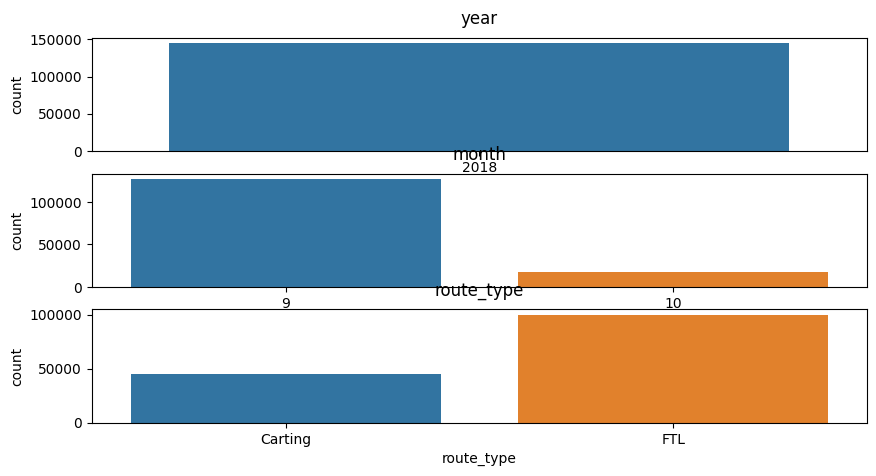

In [ ]:
# univariate analysis of  categorical column
columns= ["year", 'month', 'route_type']
fig, axis = plt.subplots(nrows=3, figsize=(10, 5))
value = 0
for i in range(3):

    sns.countplot(data=data, x=columns[value], ax=axis[i])
    axis[i].set_title(f"{columns[value]}", pad=10)
    value += 1
plt.show()

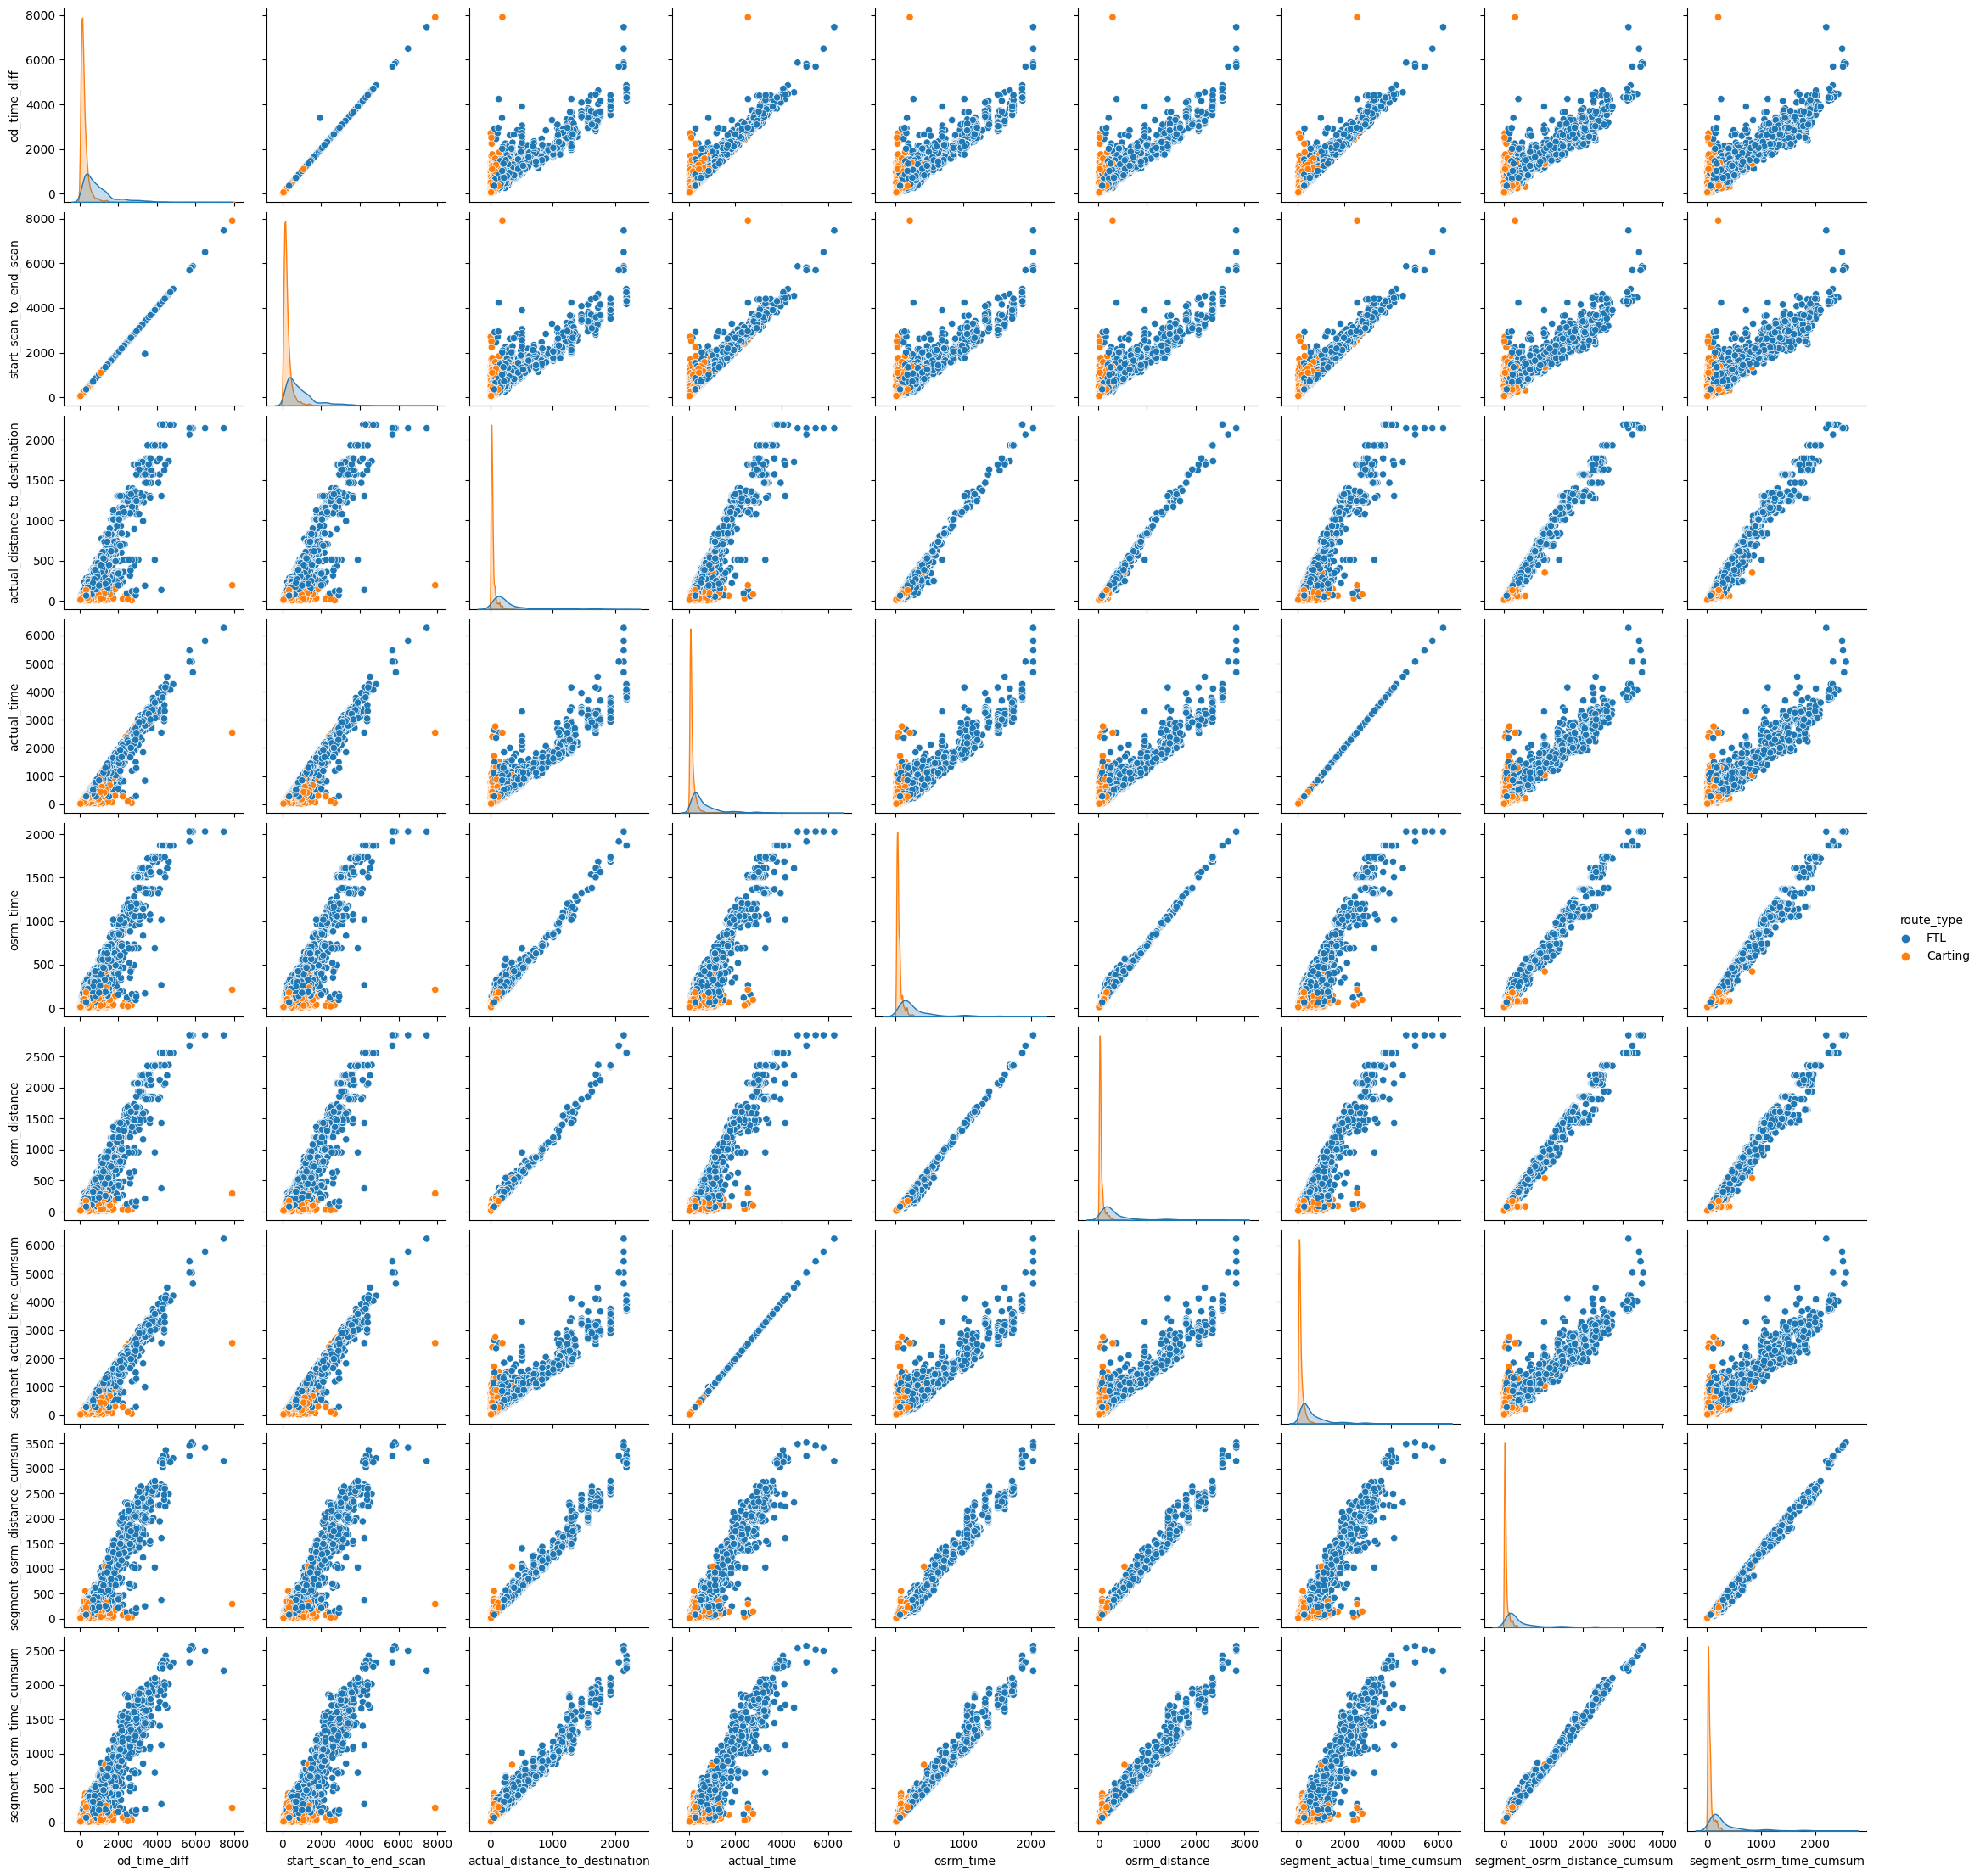

In [ ]:
sns.pairplot(agg_data, hue="route_type")

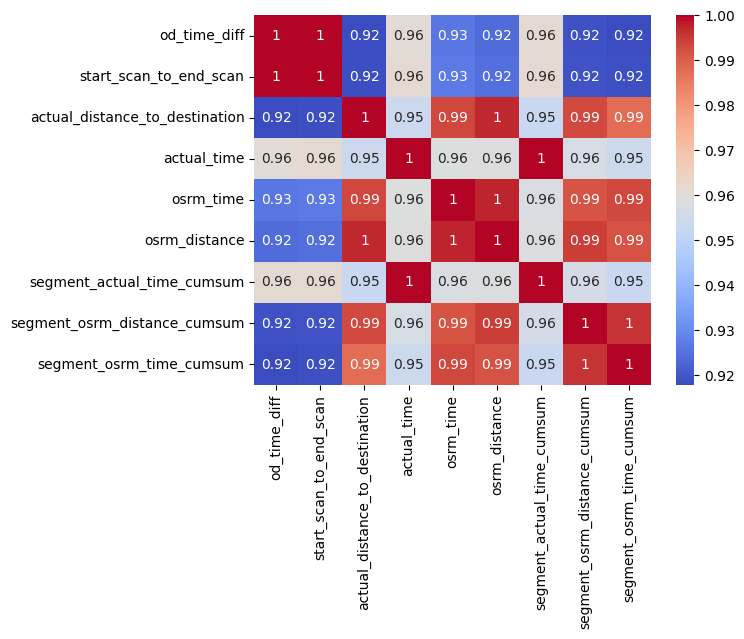

In [ ]:
sns.heatmap(agg_data.corr(),annot = True,cmap ="coolwarm")
plt.show()

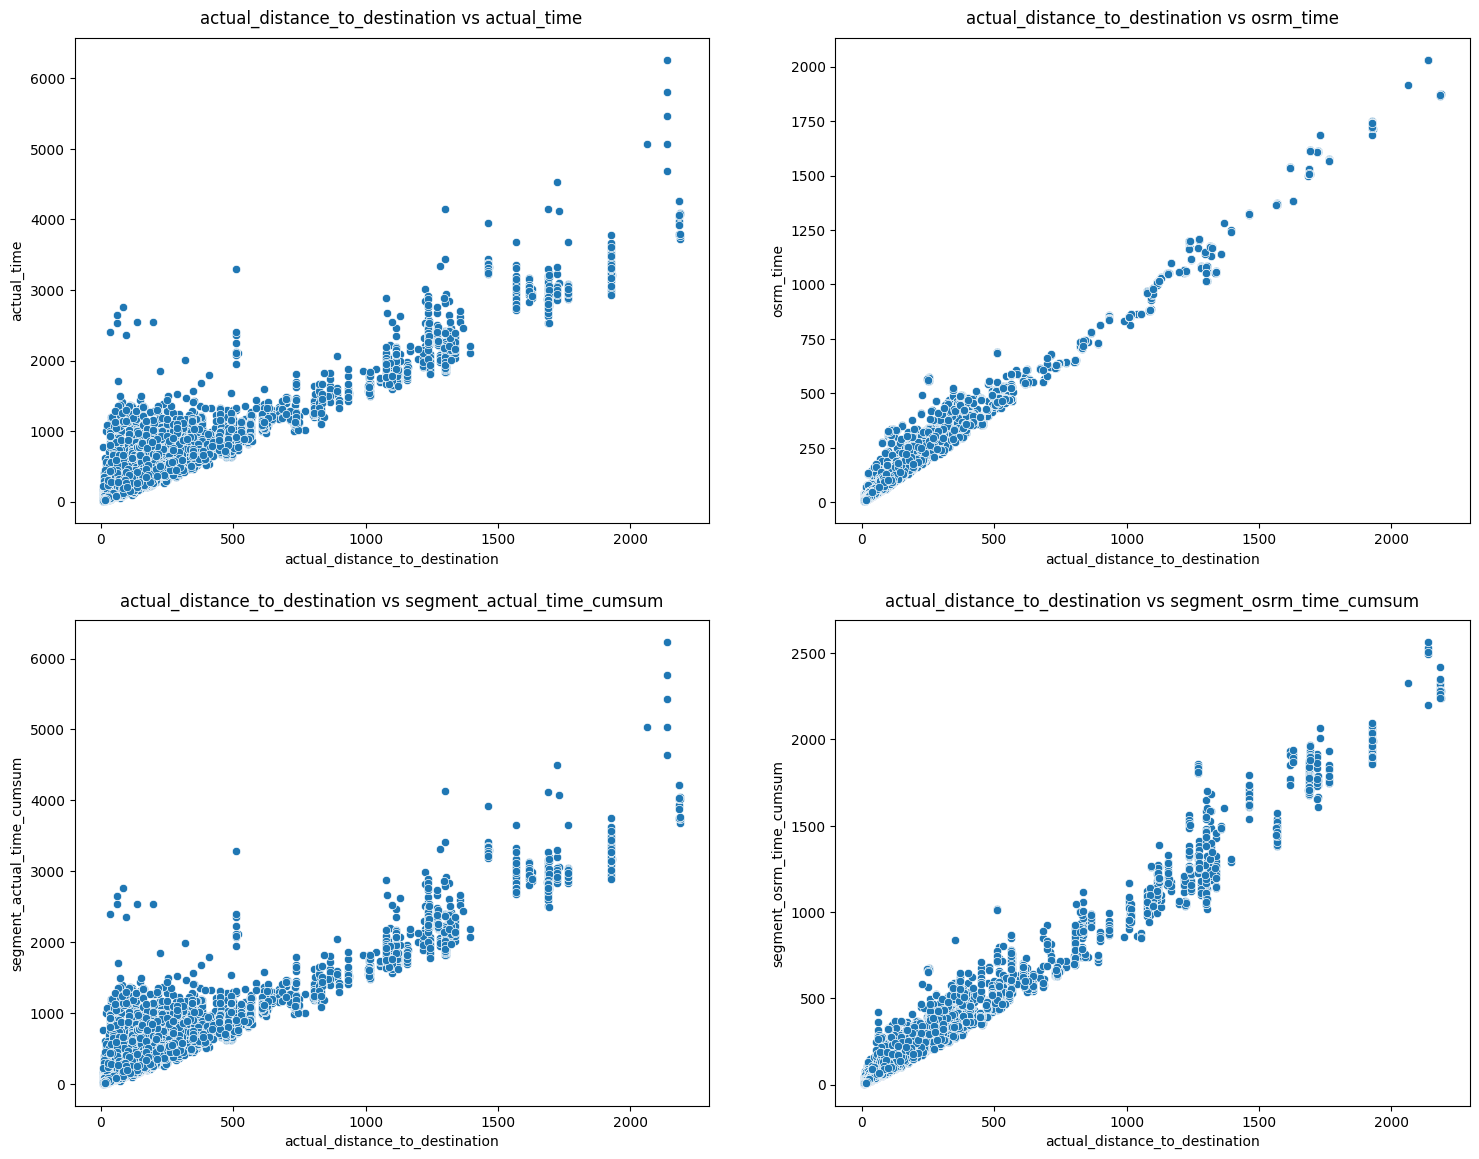

In [ ]:
# actual_distance_to_destination vs time taken
columns = ['actual_time', 'osrm_time', 'segment_actual_time_cumsum', 'segment_osrm_time_cumsum']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1)
value = 0
for i in range(2):
    for j in range(2):
        sns.scatterplot(data=agg_data, x='actual_distance_to_destination', y=columns[value], ax=axs[i,j])
        axs[i,j].set_title(f"actual_distance_to_destination vs {columns[value]}", pad=10)
        value += 1

Observations:
*   the data is given for the 2018 and for the months september and october
*   the most popular transportation type is  Full Truck Load where shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way compared to carting

*  all numerical colums posses somewhat linear relations with eacch other
*  also they have high high corelation to the respective sengments cumilative sum.
*  the actual distance to the distnation have linear relations with the time columns







# Hypothesis testing
# Checking relationship between aggregated fields

In [ ]:
def result(p_value):
  if p_value < 0.05:

    print("Reject Null Hypothesis")
  else:
    print("Failed to Reject Null Hypothesis")


* Hypothesis formulation
  * Null Hypothesis ( H0 ) - mean of samples are same.
  * Alternate Hypothesis ( HA ) - mean of samples are different.

* Two sample t-test is considered as we are comparing two samples

* Checking for basic assumpitons for the t-test
    * The data are continuous: validate by histogram
    * The sample data have been randomly sampled from a population.
    * There is homogeneity of variance (i.e., the variability of the data in each group is similar):checked by levene's test
    *  The distribution is approximately normal: validate by shapiro wilk tes


1. Compare the difference between od_time_diff. and start_scan_to_end_scan. Conducting hypothesis testing/ Visual analysis

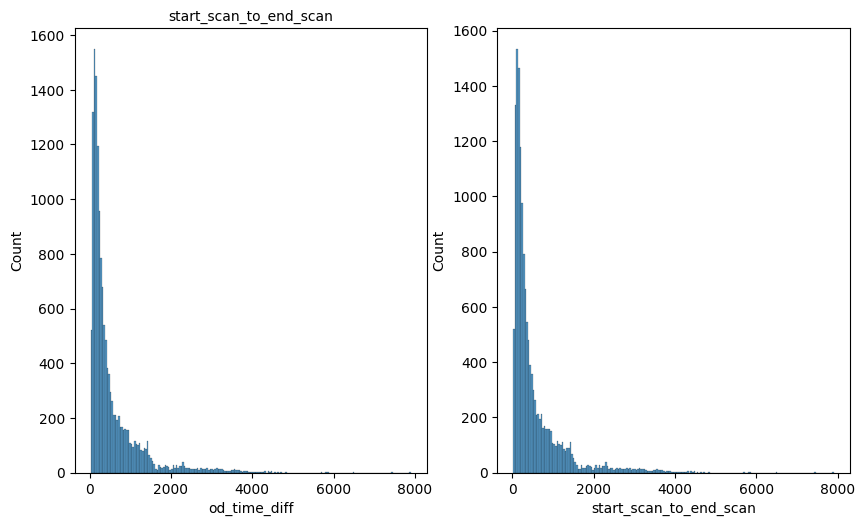

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.subplots_adjust(top=1)
sns.histplot(data= agg_data['od_time_diff'],ax= axis[0])
axis[0].set_title("od_time_diff", pad=5, fontsize=10)
sns.histplot(data= agg_data['start_scan_to_end_scan'],ax= axis[1])
axis[0].set_title("start_scan_to_end_scan", pad=5, fontsize=10)
plt.show()

In [ ]:
# levene's test
# Null hypothesis : Samples have similar variances
# Alternate Hypothesis : samples have different variences
levene_stat, p_value =stats.levene(agg_data["od_time_diff"],agg_data['start_scan_to_end_scan'])
result(p_value)

Failed to Reject Null Hypothesis


In [ ]:
# shapiro wilk test
# Null hypothesis : Sample is from the normal distributions
# Alternate Hypothesis: Sample is not from the normal distributions.
shapiro_stat, p_value =stats.shapiro(agg_data["od_time_diff"])
result(p_value)
shapiro_stat, p_value =stats.shapiro(agg_data['start_scan_to_end_scan'])
result(p_value)

Reject Null Hypothesis
Reject Null Hypothesis


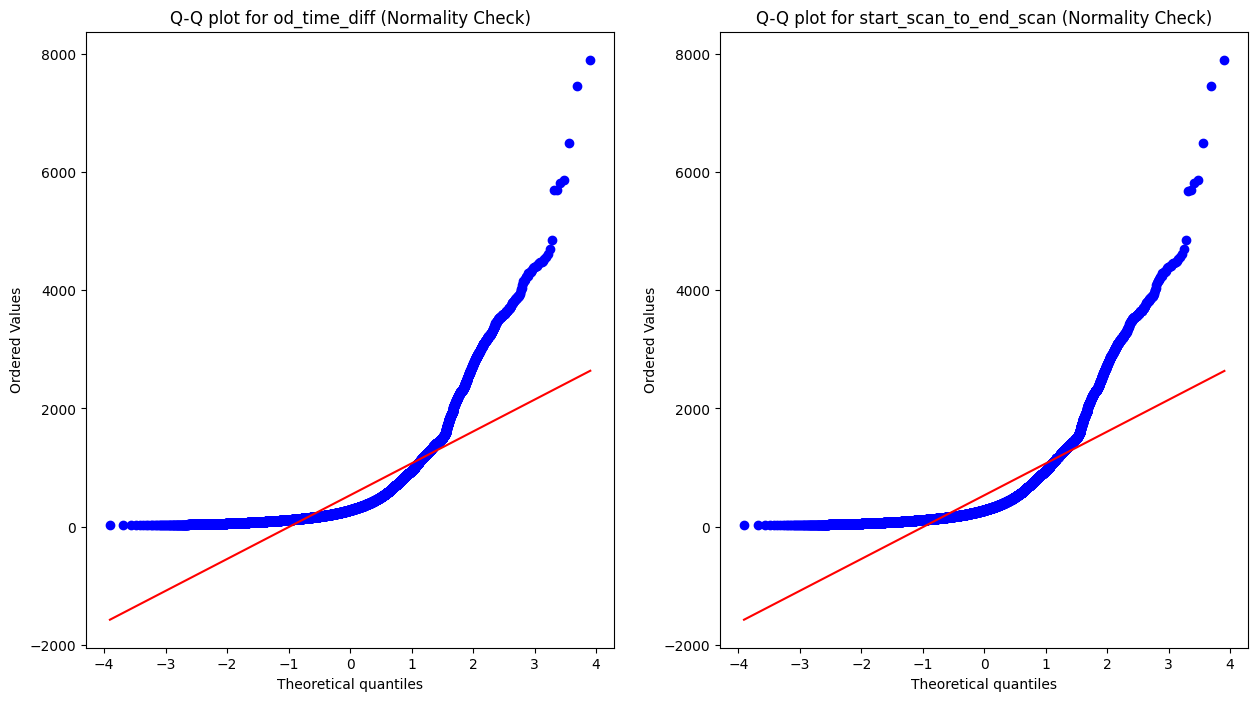

In [ ]:
# The data samples doesnot follow normal distribution. Q-Q plots are constructed to verify
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
stats.probplot(agg_data["od_time_diff"], plot= plt, dist="norm")
plt.title('Q-Q plot for od_time_diff (Normality Check)')
plt.subplot(1,2,2)
stats.probplot(agg_data['start_scan_to_end_scan'], plot= plt, dist="norm")
plt.title('Q-Q plot for start_scan_to_end_scan (Normality Check)')
plt.show()

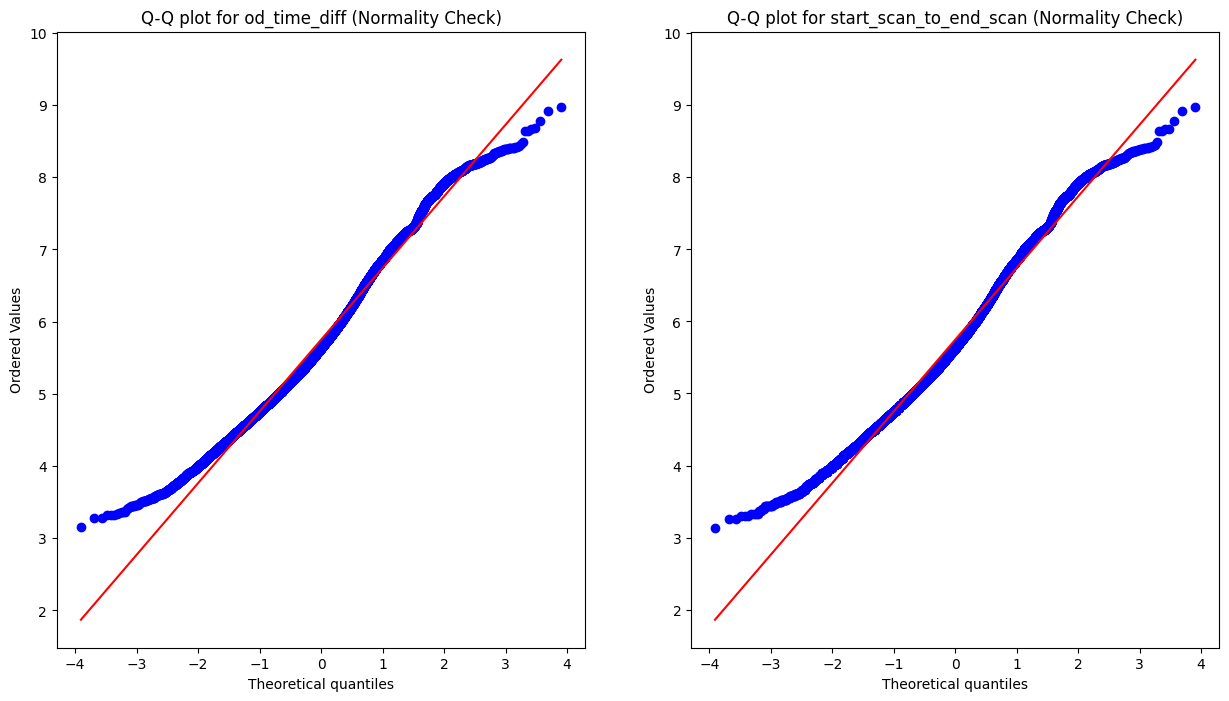

In [ ]:
# coverting to lognormal distribution
x = np.log(agg_data["od_time_diff"])
y = np.log(agg_data["start_scan_to_end_scan"])
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
stats.probplot(x, plot= plt, dist="norm")
plt.title('Q-Q plot for od_time_diff (Normality Check)')
plt.subplot(1,2,2)
stats.probplot(y, plot= plt, dist="norm")
plt.title('Q-Q plot for start_scan_to_end_scan (Normality Check)')
plt.show()

Here we are taking to consideration that t-test is tolarent towards samples being not strictly normal distributed

In [ ]:
# 2-sample t_stat test
t_stat, p_value = stats.ttest_ind(x,y)
print("p_value :",p_value )
result(p_value)

p_value : 0.7766244552710168
Failed to Reject Null Hypothesis


Observations:
* the distribution is converted to log normal distribution

* 2 sample t test concludes that mean
of "od_time_diff"  and "start_scan_to_end_scan" are  same.


2. hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value


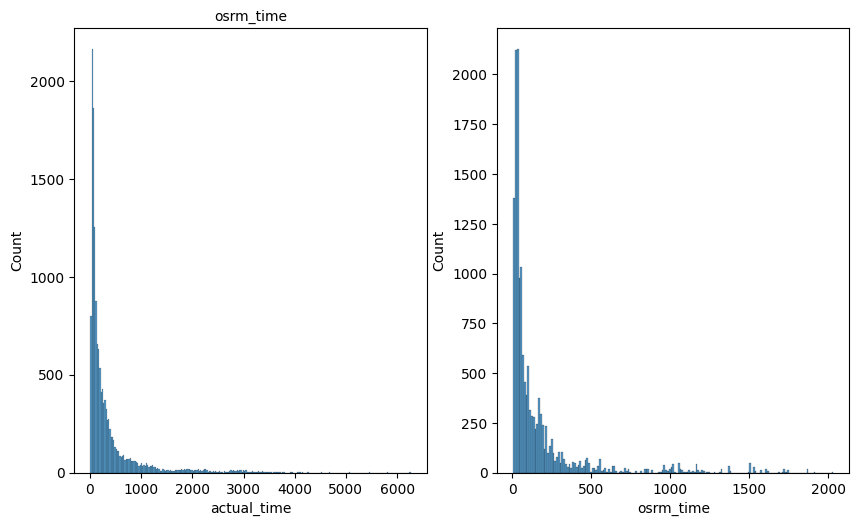

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.subplots_adjust(top=1)
sns.histplot(data= agg_data['actual_time'],ax= axis[0])
axis[0].set_title("actual_time", pad=5, fontsize=10)
sns.histplot(data= agg_data['osrm_time'],ax= axis[1])
axis[0].set_title("osrm_time", pad=5, fontsize=10)
plt.show()

In [ ]:
# levene's test
# Null hypothesis : Samples have similar variances
# Alternate Hypothesis : samples have different variences
levene_stat, p_value =stats.levene(agg_data["actual_time"],agg_data['osrm_time'])
result(p_value)

Reject Null Hypothesis


In [ ]:
# shapiro wilk test
# Null hypothesis : Sample is from the normal distributions
# Alternate Hypothesis: Sample is not from the normal distributions.
shapiro_stat, p_value =stats.shapiro(agg_data["actual_time"])
result(p_value)
shapiro_stat, p_value =stats.shapiro(agg_data['osrm_time'])
result(p_value)

Reject Null Hypothesis
Reject Null Hypothesis


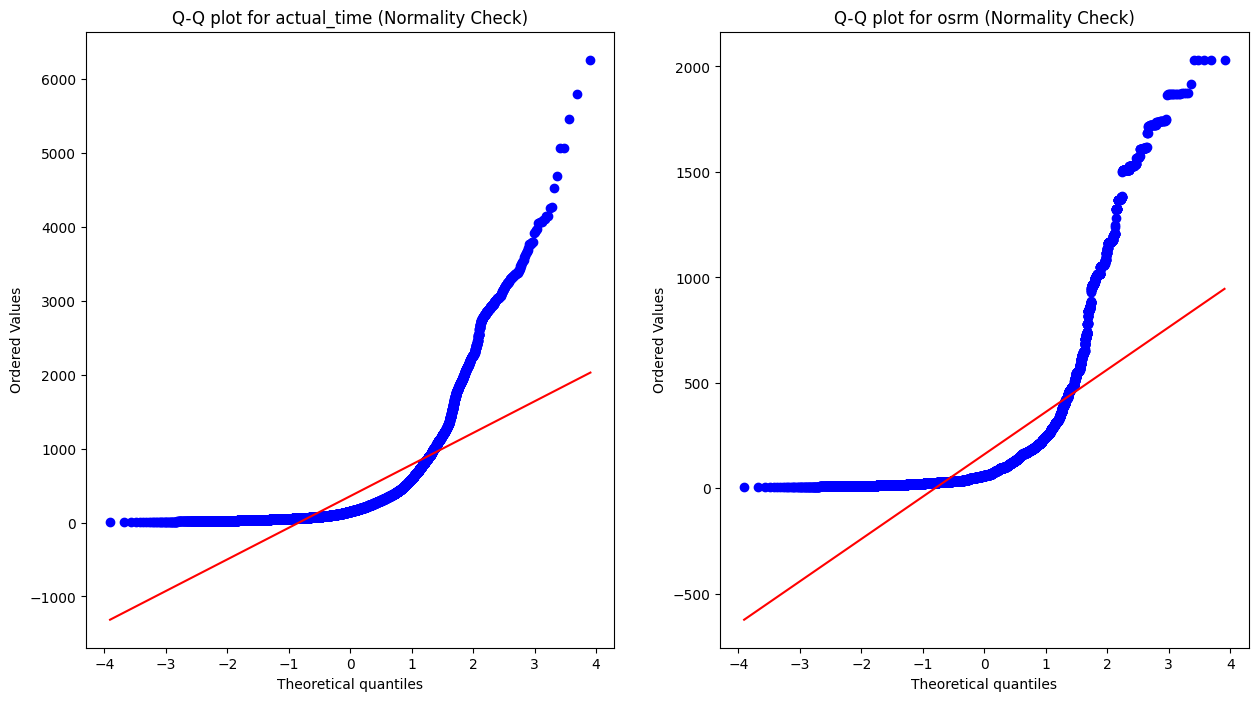

In [ ]:
# The data samples doesnot follow normal distribution. Q-Q plots are constructed to verify
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
stats.probplot(agg_data["actual_time"], plot= plt, dist="norm")
plt.title('Q-Q plot for actual_time (Normality Check)')
plt.subplot(1,2,2)
stats.probplot(agg_data["osrm_time"], plot= plt, dist="norm")
plt.title('Q-Q plot for osrm (Normality Check)')
plt.show()

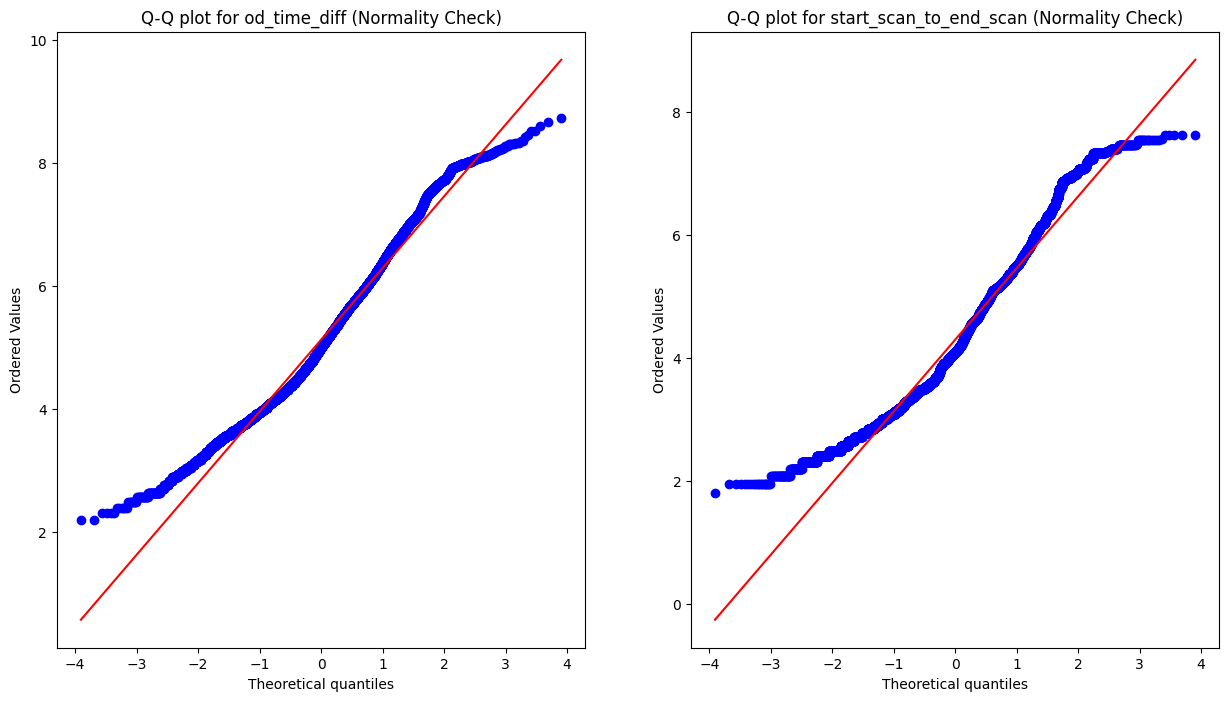

In [ ]:
# coverting to lognormal distribution
x = np.log(agg_data["actual_time"])
y = np.log(agg_data["osrm_time"])
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
stats.probplot(x, plot= plt, dist="norm")
plt.title('Q-Q plot for od_time_diff (Normality Check)')
plt.subplot(1,2,2)
stats.probplot(y, plot= plt, dist="norm")
plt.title('Q-Q plot for start_scan_to_end_scan (Normality Check)')
plt.show()

Here we are taking to consideration that t-test is tolarent towards samples being not strictly normal distributed

In [ ]:
# 2-sample t_stat test
t_stat, p_value = stats.ttest_ind(x,y)
print("p_value :",p_value )
result(p_value)

p_value : 0.0
Reject Null Hypothesis


Observation: mean of actual_time aggregated value and OSRM time aggregated value are different


3. hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value

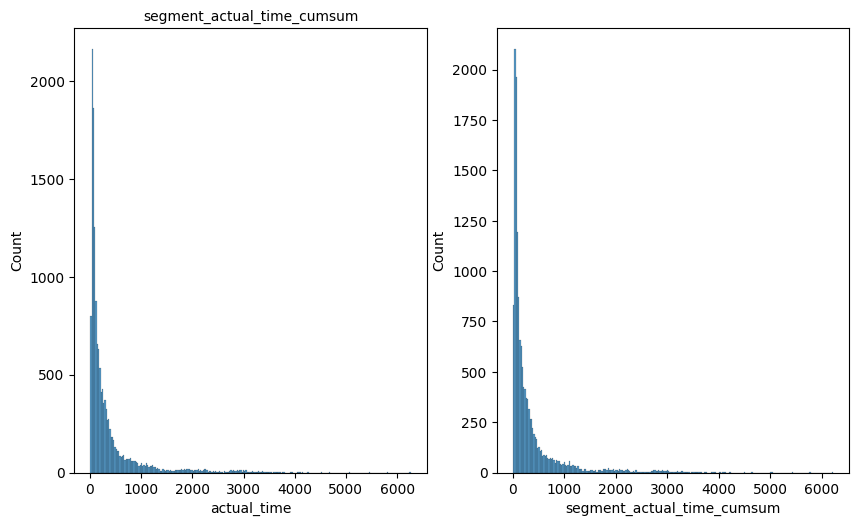

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.subplots_adjust(top=1)
sns.histplot(data= agg_data['actual_time'],ax= axis[0])
axis[0].set_title("actual_time", pad=5, fontsize=10)
sns.histplot(data= agg_data['segment_actual_time_cumsum'],ax= axis[1])
axis[0].set_title("segment_actual_time_cumsum", pad=5, fontsize=10)
plt.show()

In [ ]:
# levene's test
# Null hypothesis : Samples have similar variances
# Alternate Hypothesis : samples have different variences
levene_stat, p_value =stats.levene(agg_data["actual_time"],agg_data['segment_actual_time_cumsum'])
result(p_value)

Failed to Reject Null Hypothesis


In [ ]:
# shapiro wilk test
# Null hypothesis : Sample is from the normal distributions
# Alternate Hypothesis: Sample is not from the normal distributions.
shapiro_stat, p_value =stats.shapiro(agg_data["actual_time"])
result(p_value)
shapiro_stat, p_value =stats.shapiro(agg_data['segment_actual_time_cumsum'])
result(p_value)

Reject Null Hypothesis
Reject Null Hypothesis


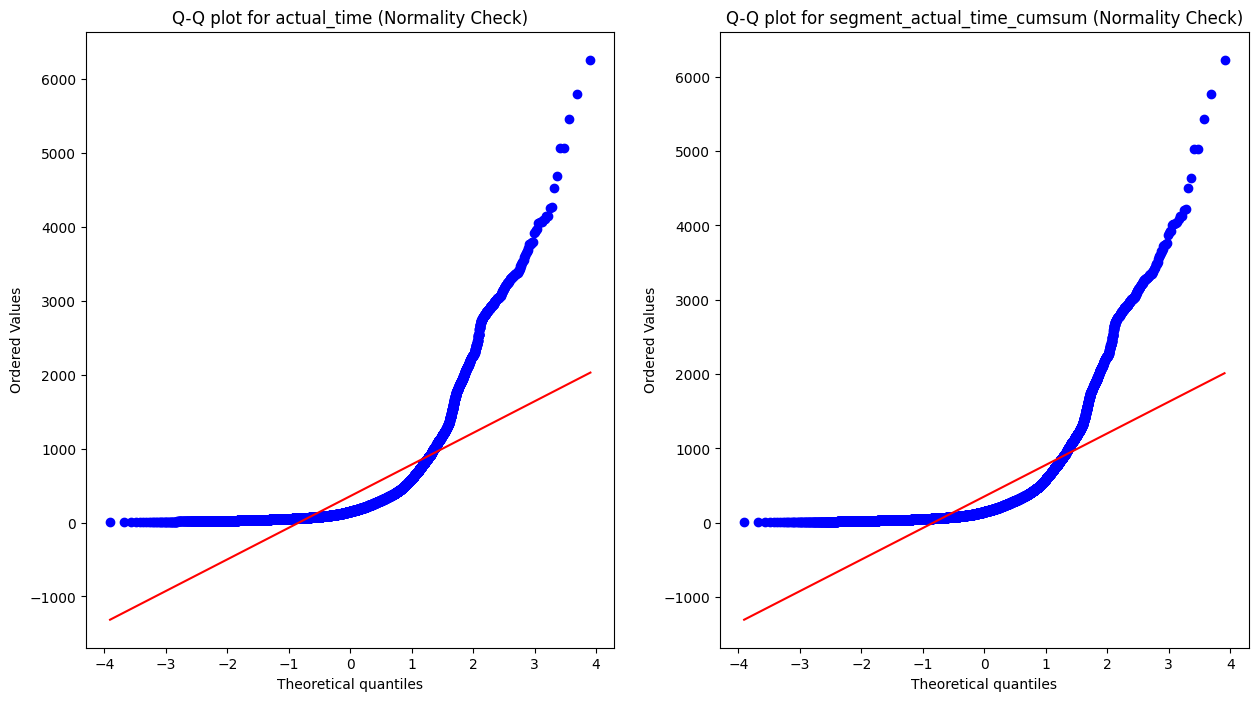

In [ ]:
# The data samples doesnot follow normal distribution. Q-Q plots are constructed to verify
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
stats.probplot(agg_data["actual_time"], plot= plt, dist="norm")
plt.title('Q-Q plot for actual_time (Normality Check)')
plt.subplot(1,2,2)
stats.probplot(agg_data["segment_actual_time_cumsum"], plot= plt, dist="norm")
plt.title('Q-Q plot for segment_actual_time_cumsum (Normality Check)')
plt.show()

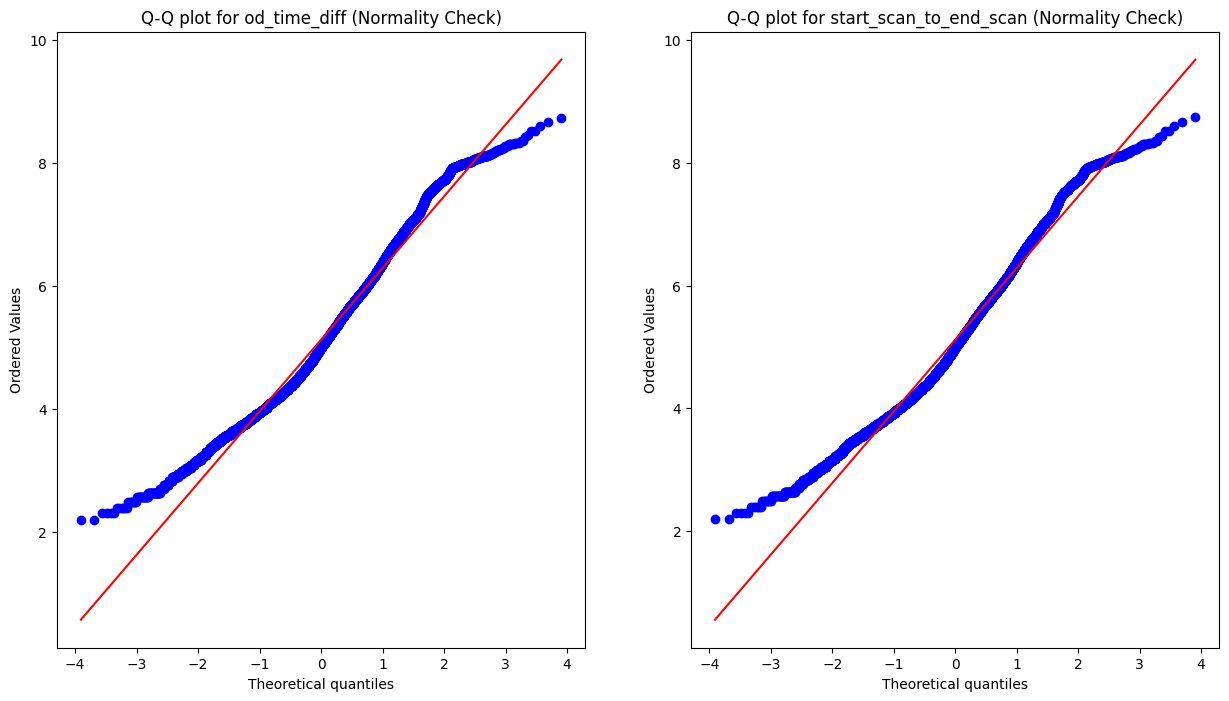

In [ ]:
x = np.log(agg_data["actual_time"])
y = np.log(agg_data["segment_actual_time_cumsum"])
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
stats.probplot(x, plot= plt, dist="norm")
plt.title('Q-Q plot for od_time_diff (Normality Check)')
plt.subplot(1,2,2)
stats.probplot(y, plot= plt, dist="norm")
plt.title('Q-Q plot for start_scan_to_end_scan (Normality Check)')
plt.show()

In [ ]:
# 2-sample t_stat test
# Here we are taking to consideration that t-test is tolarent towards samples being not strictly normal distributed
t_stat, p_value = stats.ttest_ind(x,y)
print("p_value :",p_value )
result(p_value)

p_value : 0.44170204933126633
Failed to Reject Null Hypothesis


Observations:
 mean of actual_time aggregated value and OSRM time aggregated value are same


4. Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value.

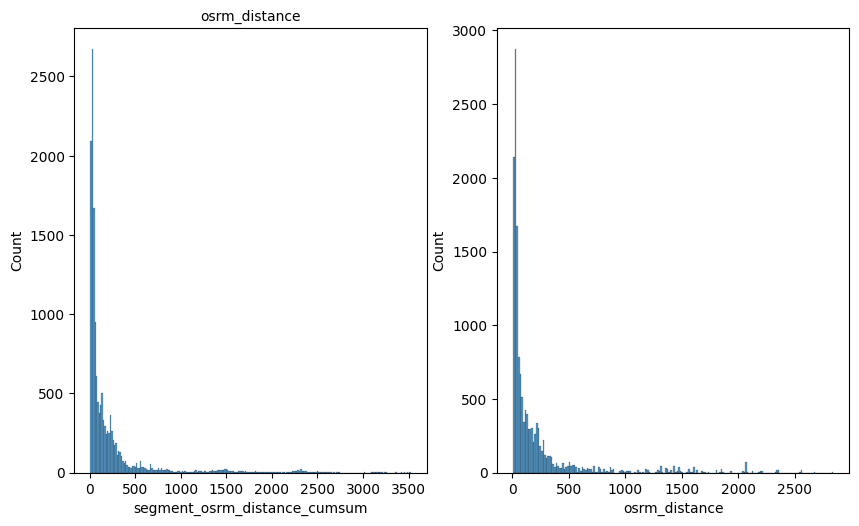

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.subplots_adjust(top=1)
sns.histplot(data= agg_data['segment_osrm_distance_cumsum'],ax= axis[0])
axis[0].set_title("segment_osrm_distance_cumsum", pad=5, fontsize=10)
sns.histplot(data= agg_data['osrm_distance'],ax= axis[1])
axis[0].set_title("osrm_distance", pad=5, fontsize=10)
plt.show()

In [ ]:
# levene's test
# Null hypothesis : Samples have similar variances
# Alternate Hypothesis : samples have different variences
levene_stat, p_value =stats.levene(agg_data["segment_osrm_distance_cumsum"],agg_data['osrm_distance'])
result(p_value)
p_value

Reject Null Hypothesis


0.00020976354422600578

In [ ]:
# shapiro wilk test
# Null hypothesis : Sample is from the normal distributions
# Alternate Hypothesis: Sample is not from the normal distributions.
shapiro_stat, p_value =stats.shapiro(agg_data["segment_osrm_distance_cumsum"])
result(p_value)
shapiro_stat, p_value =stats.shapiro(agg_data['osrm_distance'])
result(p_value)

Reject Null Hypothesis
Reject Null Hypothesis


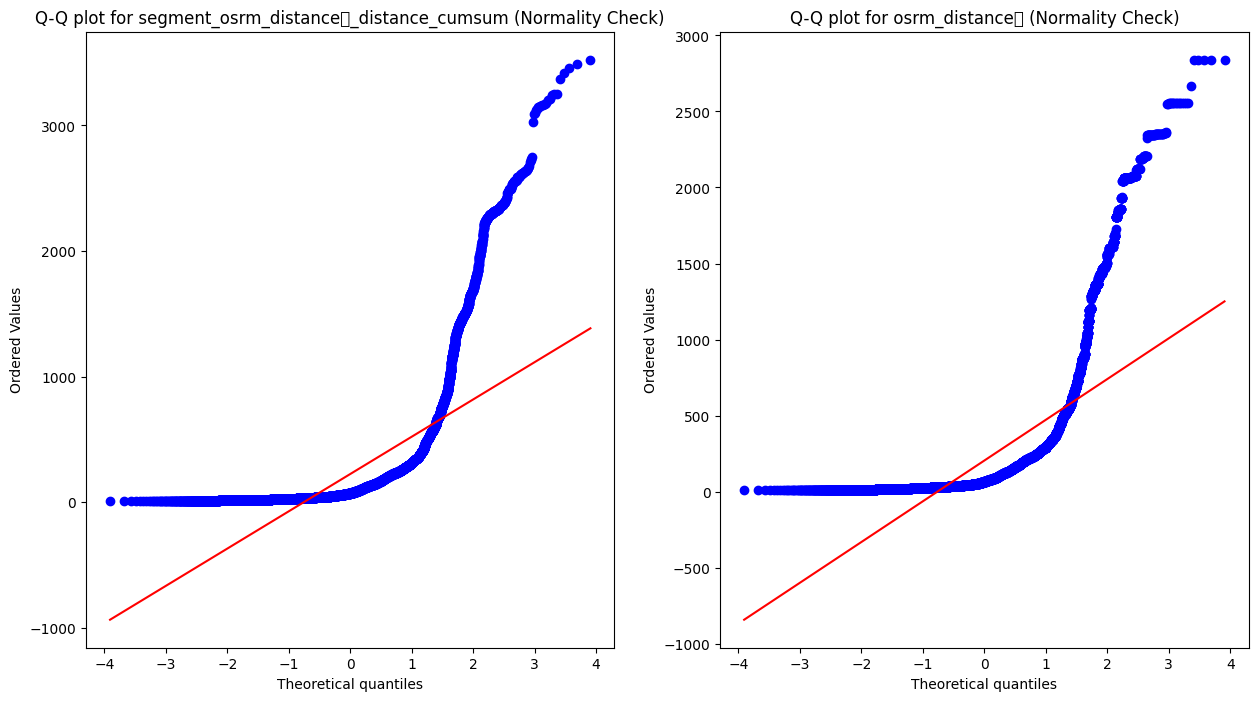

In [ ]:
# The data samples doesnot follow normal distribution. Q-Q plots are constructed to verify
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
stats.probplot(agg_data["segment_osrm_distance_cumsum"], plot= plt, dist="norm")
plt.title('Q-Q plot for segment_osrm_distance	_distance_cumsum (Normality Check)')
plt.subplot(1,2,2)
stats.probplot(agg_data["osrm_distance"], plot= plt, dist="norm")
plt.title('Q-Q plot for osrm_distance	 (Normality Check)')
plt.show()

In [ ]:
x = np.log(agg_data["segment_osrm_distance_cumsum"])
y = np.log(agg_data["osrm_distance"])

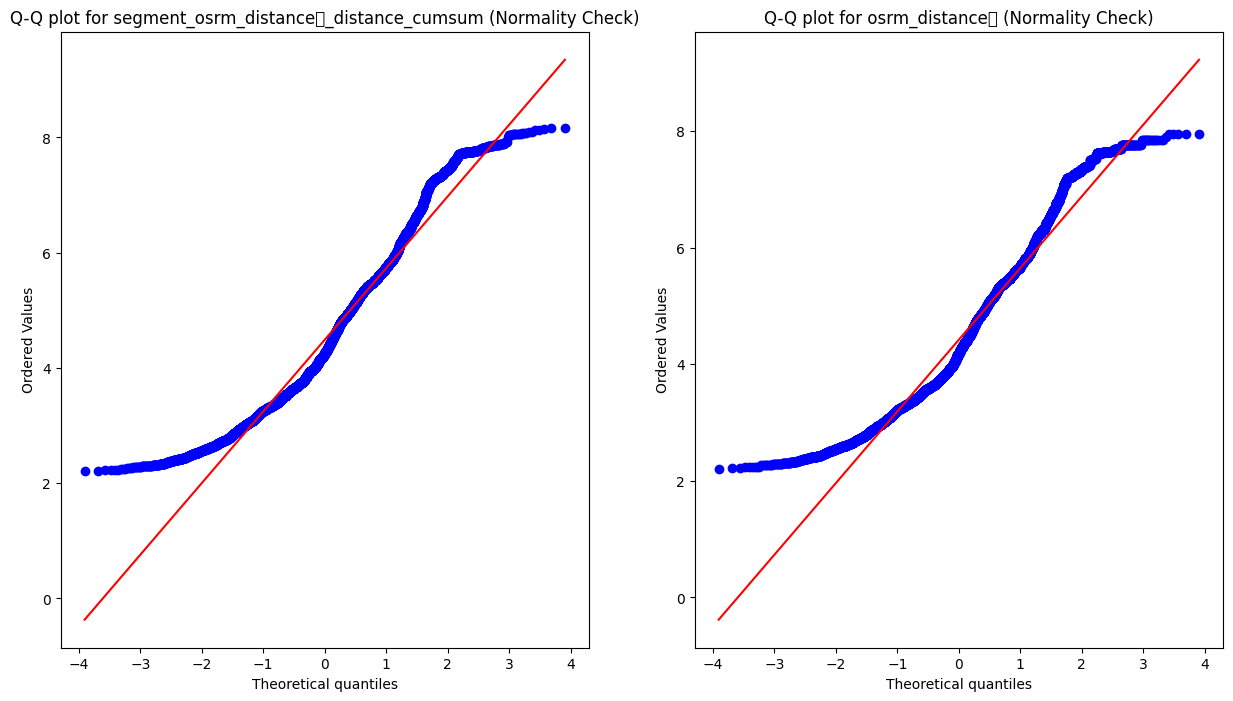

In [ ]:
# The data samples doesnot follow normal distribution. Q-Q plots are constructed to verify
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
stats.probplot(x, plot= plt, dist="norm")
plt.title('Q-Q plot for segment_osrm_distance	_distance_cumsum (Normality Check)')
plt.subplot(1,2,2)
stats.probplot(y, plot= plt, dist="norm")
plt.title('Q-Q plot for osrm_distance	 (Normality Check)')
plt.show()

In [ ]:
# 2-sample t_stat test
# Here we are taking to consideration that t-test is tolarent towards samples being not strictly normal distributed
t_stat, p_value = stats.ttest_ind(x,y)
print("p_value :",p_value )
result(p_value)

p_value : 3.5235682177389065e-06
Reject Null Hypothesis


Observations:
means of osrm distance aggregated value and segment osrm distance aggregated value are different

5. hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value

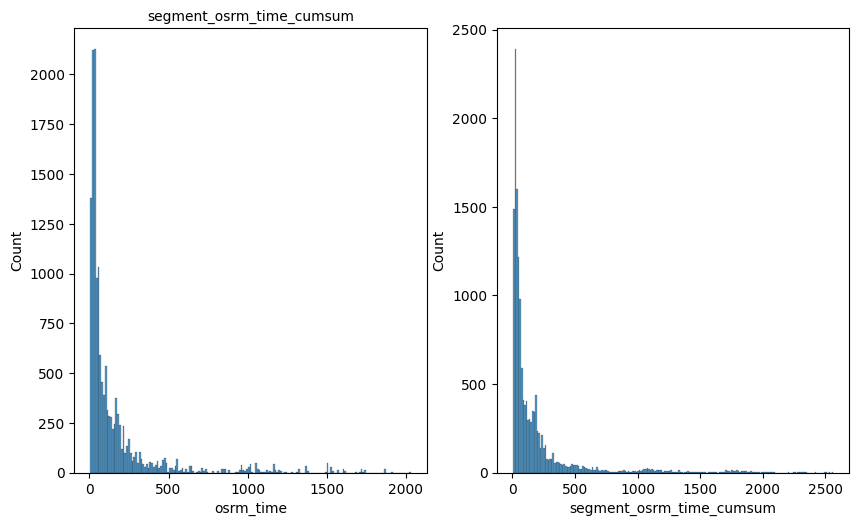

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.subplots_adjust(top=1)
sns.histplot(data= agg_data['osrm_time'],ax= axis[0])
axis[0].set_title("osrm_time", pad=5, fontsize=10)
sns.histplot(data= agg_data['segment_osrm_time_cumsum'],ax= axis[1])
axis[0].set_title("segment_osrm_time_cumsum", pad=5, fontsize=10)
plt.show()

In [ ]:
# levene's test
# Null hypothesis : Samples have similar variances
# Alternate Hypothesis : samples have different variences
levene_stat, p_value =stats.levene(agg_data["osrm_time"],agg_data['segment_osrm_time_cumsum'])
result(p_value)
p_value

Reject Null Hypothesis


8.349482669010088e-08

In [ ]:
# shapiro wilk test
# Null hypothesis : Sample is from the normal distributions
# Alternate Hypothesis: Sample is not from the normal distributions.
shapiro_stat, p_value =stats.shapiro(agg_data["osrm_time"])
result(p_value)
shapiro_stat, p_value =stats.shapiro(agg_data['segment_osrm_time_cumsum'])
result(p_value)

Reject Null Hypothesis
Reject Null Hypothesis


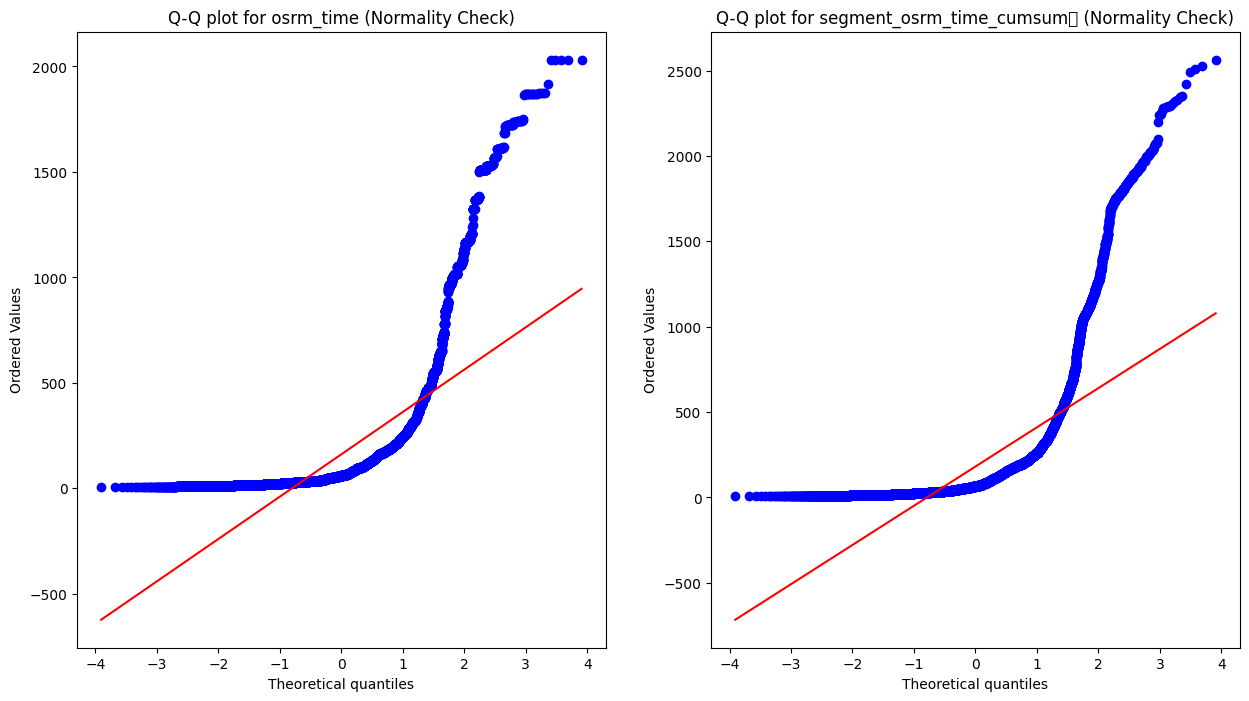

In [ ]:
# The data samples doesnot follow normal distribution. Q-Q plots are constructed to verify
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
stats.probplot(agg_data["osrm_time"], plot= plt, dist="norm")
plt.title('Q-Q plot for osrm_time (Normality Check)')
plt.subplot(1,2,2)
stats.probplot(agg_data["segment_osrm_time_cumsum"], plot= plt, dist="norm")
plt.title('Q-Q plot for segment_osrm_time_cumsum	 (Normality Check)')
plt.show()

In [ ]:
x = np.log(agg_data["osrm_time"])
y = np.log(agg_data["segment_osrm_time_cumsum"])

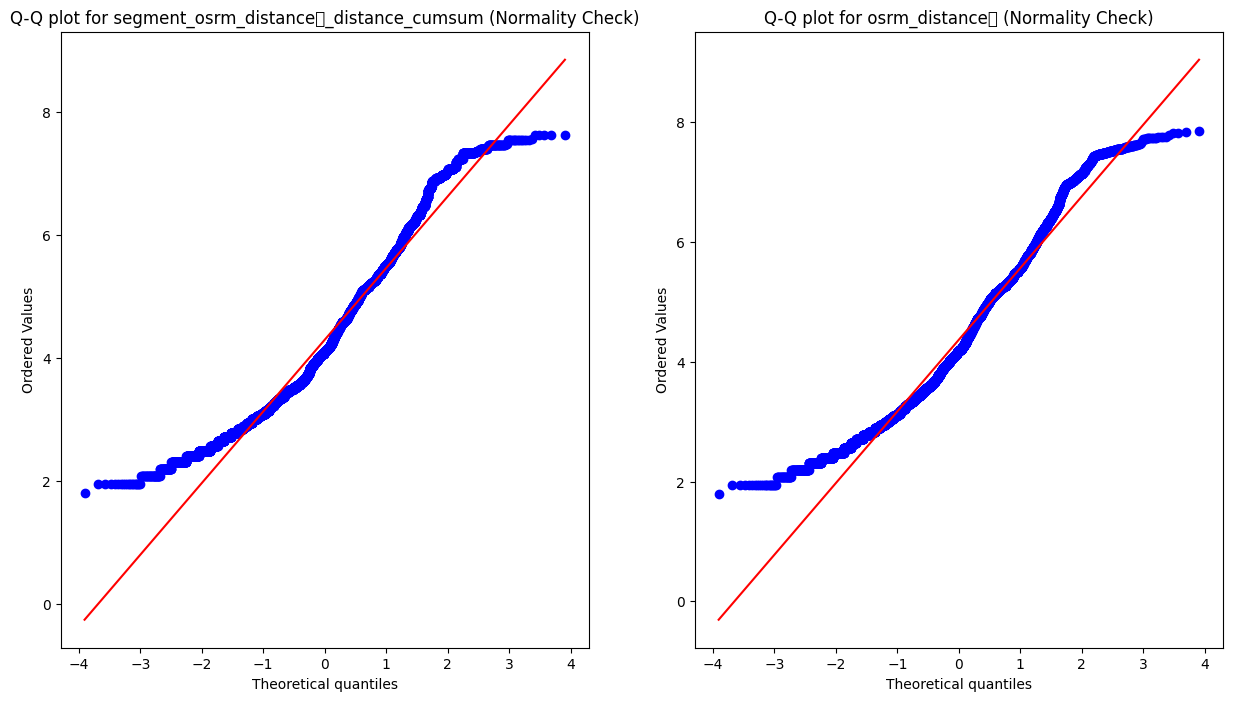

In [ ]:
# The data samples doesnot follow normal distribution. Q-Q plots are constructed to verify
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
stats.probplot(x, plot= plt, dist="norm")
plt.title('Q-Q plot for segment_osrm_distance	_distance_cumsum (Normality Check)')
plt.subplot(1,2,2)
stats.probplot(y, plot= plt, dist="norm")
plt.title('Q-Q plot for osrm_distance	 (Normality Check)')
plt.show()

In [ ]:
# 2-sample t_stat test
# Here we are taking to consideration that t-test is tolarent towards samples being not strictly normal distributed
t_stat, p_value = stats.ttest_ind(x,y)
print("p_value :",p_value )
result(p_value)

p_value : 1.6121604774884692e-08
Reject Null Hypothesis


Observations:
means of  osrm time aggregated value and segment osrm time aggregated value are different

# Outlier Treatment

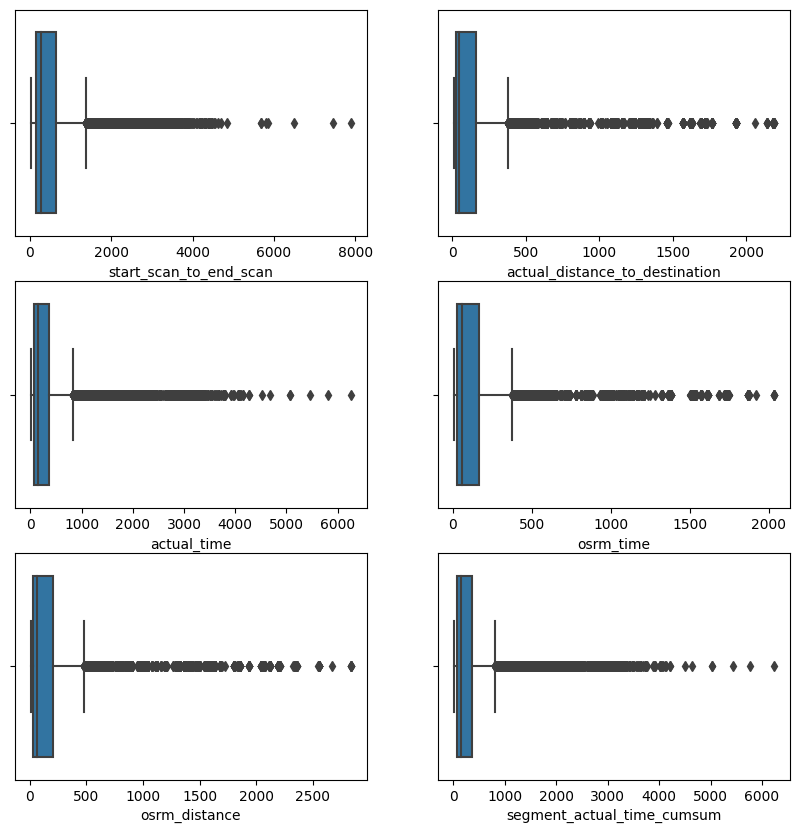

In [ ]:
# finding outliers in numerical fields
columns = ["start_scan_to_end_scan","actual_distance_to_destination","actual_time","osrm_time","osrm_distance",
           "segment_actual_time_cumsum","segment_osrm_distance_cumsum","segment_osrm_time_cumsum","od_time_diff"]
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
index = 0
for row in range(3):
 for col in range(2):
  sns.boxplot(x=agg_data[columns[index]], ax=axis[row, col])
  index += 1
plt.show()

In [ ]:
# removing outliers above upper bound and below bound values
for col in columns:
 Q1 = agg_data[col].quantile(0.25)
 Q3 = agg_data[col].quantile(0.75)
 IQR = Q3 - Q1
 S = 1.5*IQR
 LB = Q1 - S
 UB = Q3 + S
 agg_data1 = agg_data[(agg_data[col] <= UB) & (agg_data[col] >= LB)]


# one-hot encoding of Route_type

In [ ]:
one_hot_encoded_data = pd.get_dummies(agg_data, columns = ['route_type'])
one_hot_encoded_data[["route_type_Carting","route_type_FTL"]]

,route_type_Carting,route_type_FTL
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
14812,1,0
14813,1,0
14814,1,0
14815,1,0


# Normalization/ Standardization the numerical features using MinMaxScaler or StandardScaler

In [ ]:
num_fields= agg_data.loc[:,["start_scan_to_end_scan","actual_distance_to_destination","actual_time","osrm_time","osrm_distance",
           "segment_actual_time_cumsum","segment_osrm_distance_cumsum","segment_osrm_time_cumsum","od_time_diff"]]
scaler = StandardScaler()
data_norm = scaler.fit_transform(num_fields)
data_norm = pd.DataFrame(num_fields, columns=num_fields.columns)
data_norm.head()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_cumsum,segment_osrm_distance_cumsum,segment_osrm_time_cumsum,od_time_diff
0,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0,2260.1
1,180.0,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,181.6
2,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0,3934.3
3,100.0,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,100.5
4,717.0,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0,718.3


# Insights
*  Shape of the data is (144867, 24).
*  Data fetch if from sepetember 2018 to October 2018.
*  The entire data is heavily right skewed.
*  60% data is from Carting route_type & the remaining 40% is from FTL route type.
* Two sample t test concludes that mean of "od_time_diff" and "start_scan_to_end_scan" are same.
* Mean of actual_time aggregated value and OSRM time aggregated value are different
* Means of osrm distance aggregated value and segment osrm distance aggregated value are different
*  Means of osrm time aggregated value and segment osrm time aggregated value are different


# Recomendations
*  FTL route consists of 40% of the total orders. There is need to have more ways to
promote. FTL route handling system can be implemented to increase this percentage
*   OSRM data are very much deviated from actual data. Hence, the already applied sytem
is not reliable. There is need to update Recommender system.
* Storage, warehousing and materials handling need to be best in states like
Maharashtra, Karnataka, Haryana

